# Statistical Inference of Bank Customers 

At this point, you’ve obtained the dataset for your capstone project, cleaned, and wrangled it into a form that's ready for analysis. It's now time to apply the inferential statistics techniques you’ve learned to explore the data.

Based on your dataset, the questions that interest you, and the results of the visualization techniques that you used previously, you should choose the most relevant statistical inference techniques. You aren’t expected to demonstrate all of them. Your specific situation determines how much time it’ll take you to complete this project. Talk to your mentor to determine the most appropriate approach to take for your project. You may find yourself revisiting the analytical framework that you first used to develop your proposal questions. It’s fine to refine your questions more as you get deeper into your data and find interesting patterns and answers. Remember to stay in touch with your mentor to remain focused on the scope of your project

Think of the following questions and apply them to your dataset:

- Are there variables that are particularly significant in terms of explaining the answer to your project question?
- Are there significant differences between subgroups in your data that may be relevant to your project aim?
- Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?
- What are the most appropriate tests to use to analyze these relationships?

**The Dataset is about bank customers churning and can be found on Kaggle:**   
https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

**Disclaimer: The dataset above is simulated**

## Load the Data

In [9]:
# Load the required libraries for data manipulation and data visualization 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [10]:
# Load the dataset from local directory into a Pandas dataframe called 'df'
df = pd.read_csv('Churn_Modelling.csv', index_col=None)

In [11]:
# View the shape of the data using .shape
df.shape

(10000, 14)

# Data Wrangling
- Drop the RowNumber column
- Convert the Geography into categorical values. In the Geography column, France, Germany and Spain correspond to 0 , 1 and 2 respectively. 
- Convert the Gender into categorical values. In the Gender column, Male and Female correspond to 0 and 1 respectively. 
- Move the Exited column (the response variable) to the front of the dataframe for visual purposes.

In [12]:
#Drop the RowNumber column as it is redundant 
df.drop('RowNumber', axis = 1, inplace=True)

In [13]:
df['Geography'].replace(['France', 'Germany', 'Spain'], [0, 1, 2], inplace=True)
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [15]:
first_column = df['Exited']
df.drop('Exited', axis=1,inplace=True)
df.insert(0, 'Exited', first_column)
df.head()

,Exited,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,0,1,42,2,0.00,1,1,1,101348.88
1,0,15647311,Hill,608,2,1,41,1,83807.86,1,0,1,112542.58
2,1,15619304,Onio,502,0,1,42,8,159660.80,3,1,0,113931.57
3,0,15701354,Boni,699,0,1,39,1,0.00,2,0,0,93826.63
4,0,15737888,Mitchell,850,2,1,43,2,125510.82,1,1,1,79084.10


# Summary Statistics 

In [17]:
# Look at the proportion of customers who exited and didn't exit. 
# 79.6% of customers stayed at the bank while 20.4% of the customers exited the bank. 
exit_rate = df['Exited'].value_counts() / len(df)
exit_rate

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [19]:
sum_exit_rate = df.groupby('Exited').mean()
sum_exit_rate

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,,
0,1.569117e+07,651.853196,0.731257,0.427477,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,1.569005e+07,645.351497,0.805106,0.559156,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [26]:
round(df.mean(), 2)

Exited                    0.20
CustomerId         15690940.57
CreditScore             650.53
Geography                 0.75
Gender                    0.45
Age                      38.92
Tenure                    5.01
Balance               76485.89
NumOfProducts             1.53
HasCrCard                 0.71
IsActiveMember            0.52
EstimatedSalary      100090.24
dtype: float64

# Statistical Analysis 

In [28]:
# Separate the exited and non-exited customers from the dataset into two groups  

# Cust_exit contains the first group; customers who exited
cust_exit = df[df['Exited'] == 1]

# Cust_no_exit contains the first group; customers who didn't exited
cust_no_exit = df[df['Exited'] == 0]

In [29]:
# Extract and store the len of the two groups of data. 

n1 = len(cust_exit)

n0 = len(cust_no_exit)

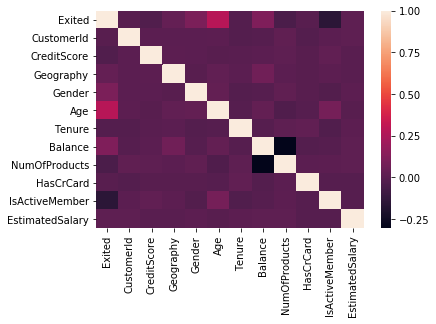

In [35]:
corr = df.corr()
sns.heatmap(corr)

# Histograms

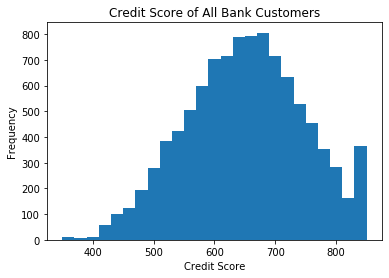

In [95]:
# Graph of Entire Bank Population (Customer Turnover)
df['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of All Bank Customers').set_xlabel('Credit Score')
plt.show()

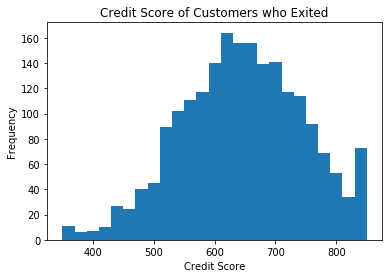

In [94]:
cust_exit['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of Customers who Exited').set_xlabel('Credit Score')
plt.show()

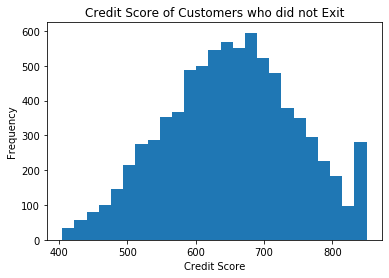

In [93]:
cust_no_exit['CreditScore'].plot(kind='hist', bins = 25,title = 'Credit Score of Customers who did not Exit').set_xlabel('Credit Score')
plt.show()

# T-Test

**A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.**

## One Sample T-Test 

A one-sample t-test is used to test whether a population mean is significantly different from some hypothesized value. We are going to test to see whether the average credit score of customers that exited differs from the entire employee population. 

Hypothesis Testing: Is there significant difference in the means of credit score between customers who exited and the entire bank customers? 

**Null Hypothesis:** The null hypothesis would be there there is **no** difference in credit score between employees who exited and all bank customers. 

**Alternate Hypothesis:** The alternative hypothesis would be that there **is** a difference in credit scores between customers who exited and all bank customers. 

In [85]:
# Look at the means of the credit score of customers who exited and all bank customers 
mean_all_cust  =   df['CreditScore'].mean()
mean_cs_exit = cust_exit['CreditScore'].mean()

print('The mean credit score of all bank customers is ' + str(mean_all_cust))
print('The mean credit score of bank customers who exited is ' + str(mean_cs_exit))

The mean credit score of all bank customers is 650.5288
The mean credit score of bank customers who exited is 645.3514972999509


### Conduct the T-Test

Let's conduct a t-test at 95% confidence interval and see if the null hypothesis (sample comes from the same distribution as the bank customers population) is correctly rejected. We can conduct a one sample t-test using the stats.ttest_1samp() function:

In [86]:
import scipy.stats as stats

import scipy.stats as stats

stats.ttest_1samp(a=  cust_exit['CreditScore'], # Sample of Credit Scores of Employees who Exited the bank
                  popmean = mean_all_cust) # Mean of the population 

Ttest_1sampResult(statistic=-2.3291906789604067, pvalue=0.019946347165310532)

The test result shows the test statistic 't' is equal to -2.329. T is simply the calculated difference represented in units of standard error and tells us how much the sample mean deviates from the null hypothesis. We can reject the null hypothesis if the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom. We can check the quantiles with stats.t.ppf():

T is simply the calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis. This means there is greater evidence that there is a significant difference. The closer T is to 0, the more likely there isn't a significant difference.

In [88]:
degree_of_freedom = len(df[df['Exited']==1])

left_quartile = stats.t.ppf(0.025,degree_of_freedom)  # Left Quartile

right_quartile = stats.t.ppf(0.975,degree_of_freedom)  # Right Quartile

print ('The t-distribution left quartile range is: ' + str(left_quartile))
print ('The t-distribution right quartile range is: ' + str(right_quartile))

The t-distribution left quartile range is: -1.96112925575354
The t-distribution right quartile range is: 1.9611292557535396


A p-value of 0.019946347165310532 means we'd expect to see data as extreme as our sample due to chance way less than 5% of the time if the null hypothesis was true. In this case, the p-value is lower than our significance level α (equal to 1-conf.level or 0.05) so we should reject the null hypothesis. If we were to construct a 95% confidence interval for the sample it would not capture bank customer's credit score mean of 650.5288:

In [89]:
import math

sigma = cust_exit['CreditScore'].std()/math.sqrt(degree_of_freedom + 1)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = degree_of_freedom,                     # Degrees of freedom
                 loc = mean_cs_exit, # Sample mean
                 scale= sigma)

(640.9933876070597, 649.709606992842)

### One Sample T-Test Summary 

Based on the statistical analysis of a one sample t-test, there seems to be some significant difference between the mean credit score of bank customers who exited and the entire bank customer population. The low P-value of 0.019946347165310532 at a 5% confidence interval is a good indicator to reject the null hypothesis. Although, we should be mindful that this does not necessarily mean that there is practical significance. We can conduct more experiments or maybe collect more data about the bank customers in order to get more accurate insights. I would recommend to get more variable from the bank customers database that could have more impact on determining bank customers exiting and credit score such as satisfaction levels with the bank, APR rates offered by the bank and etc 